# Evaluation Project - 10 Temperature Forecast Project using ML
Problem Statement:
Data Set Information:

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.


Attribute Information:

For more information, read [Cho et al, 2020].
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

Please note that there are two target variables here: 

1) Next_Tmax: Next day maximum temperature

2) Next_Tmin: Next day  minimum temperature

In [1]:
#Importing Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('Temperature_Prediction.csv')
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [4]:
pd.set_option('display.max_columns',None)

In [5]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [6]:
#checking the datatype of each column 
print(df.dtypes)
# All features are of float type except date which is a object type data
print(df.info())

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null  

In [7]:
#Checking shaoe
df.shape

(7752, 25)

There re 7752 rows and 25 columns

In [8]:
#Checking columns
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

# EDA

In [9]:
#Checking null values
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

Null values are there exept lat,lon,slope and solar radiation

<AxesSubplot:>

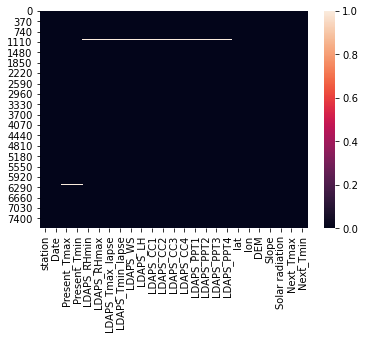

In [10]:

#checking null values using heat map
sns.heatmap(df.isnull())

In [11]:
#dropping the nan values 
df.dropna(how='any',inplace=True)

In [12]:
#Checking the shape again
df.shape

(7588, 25)

Rows decreased now

In [13]:
#Checking null values agian
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

No null values are there

In [17]:
df['Date'].value_counts()

30-06-2015    25
21-07-2017    25
08-07-2016    25
25-08-2013    25
20-07-2015    25
              ..
23-08-2017    22
24-07-2015    22
06-07-2017    22
13-08-2015    22
30-06-2017    16
Name: Date, Length: 307, dtype: int64

In [18]:
#Checking data tyoes
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [19]:
df.drop(['Date'],axis=1,inplace=True)

Data Analysis Through Visualization

{'bodies': [<matplotlib.collections.PolyCollection at 0x2602d6aed00>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x2602cc4f0d0>,
 'cmins': <matplotlib.collections.LineCollection at 0x2602d6be1c0>,
 'cbars': <matplotlib.collections.LineCollection at 0x2602d6be4c0>}

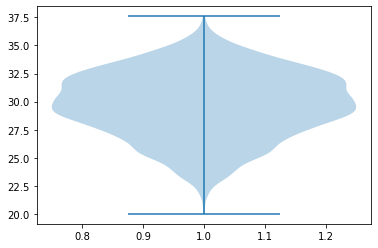

In [20]:
plt.violinplot(df["Present_Tmax"])

{'bodies': [<matplotlib.collections.PolyCollection at 0x2602d71d310>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x2602d71d130>,
 'cmins': <matplotlib.collections.LineCollection at 0x2602d71d160>,
 'cbars': <matplotlib.collections.LineCollection at 0x2602d71d7c0>}

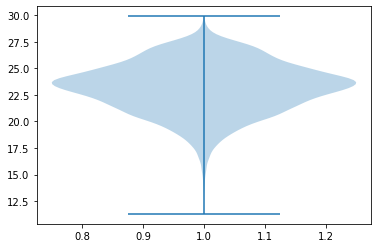

In [21]:
plt.violinplot(df["Present_Tmin"])

{'bodies': [<matplotlib.collections.PolyCollection at 0x2602d775970>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x2602d775790>,
 'cmins': <matplotlib.collections.LineCollection at 0x2602d7757c0>,
 'cbars': <matplotlib.collections.LineCollection at 0x2602d784160>}

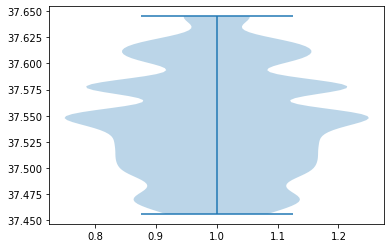

In [22]:
plt.violinplot(df["lat"])

{'bodies': [<matplotlib.collections.PolyCollection at 0x2602d7dd4f0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x2602d7dd310>,
 'cmins': <matplotlib.collections.LineCollection at 0x2602d7dd340>,
 'cbars': <matplotlib.collections.LineCollection at 0x2602d7dd9a0>}

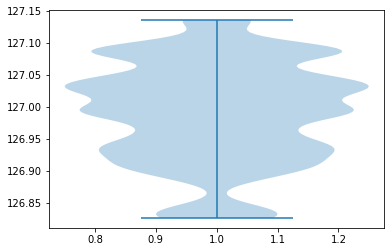

In [23]:
plt.violinplot(df["lon"])

<AxesSubplot:title={'center':'Next day maximum Temperature'}, xlabel='Next_Tmax', ylabel='Density'>

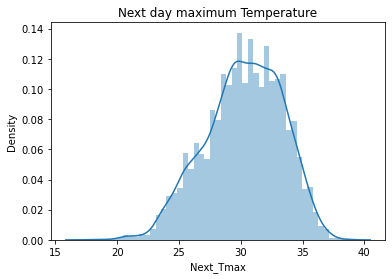

In [65]:
# Distplot Display distribution of data across Next day maximum Temperature.
plt.title('Next day maximum Temperature')
sns.distplot(df['Next_Tmax'],kde=True)

<AxesSubplot:title={'center':'Next day minimum Temperature'}, xlabel='Next_Tmin', ylabel='Density'>

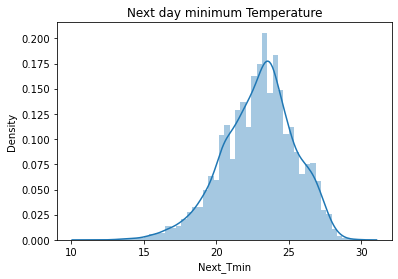

In [66]:
# Distplot Display distribution of data across Next day minimum Temperature.
plt.title('Next day minimum Temperature')
sns.distplot(df['Next_Tmin'],kde=True)

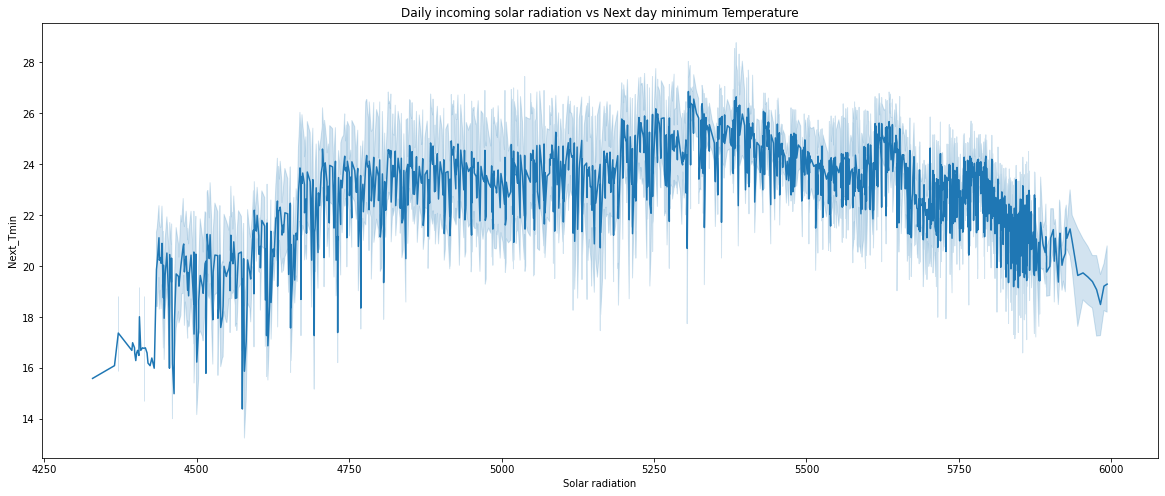

In [57]:
plt.figure(figsize=(20,8))
plt.title('Daily incoming solar radiation vs Next day minimum Temperature')
sns.lineplot(x='Solar radiation',y='Next_Tmin',data=df)
plt.show()

According to solar radiation, the next day minimum temparature frequently increases.

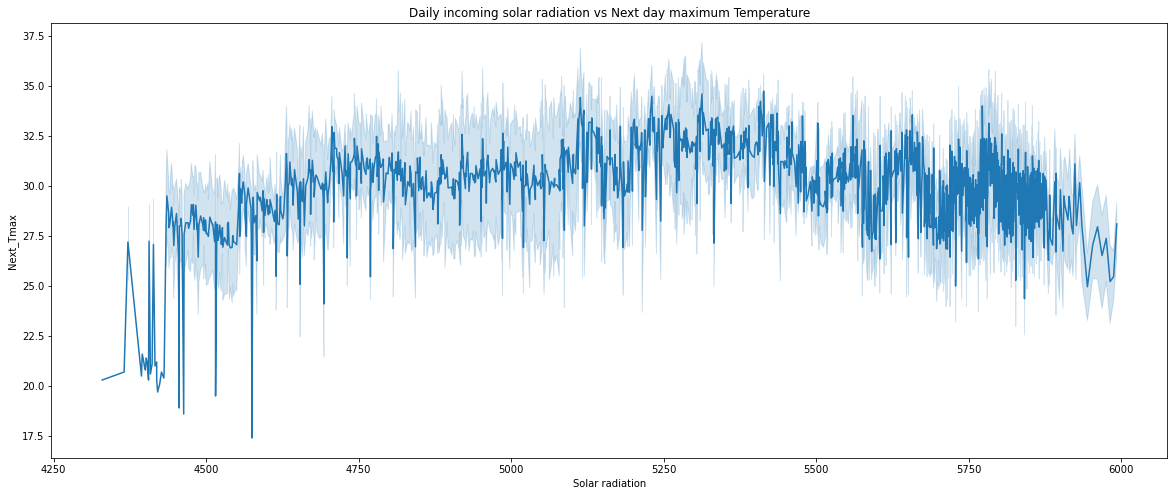

In [58]:
# Lineplot Display distribution of data across Daily incoming solar radiation vs Next day maximum Temperature.
plt.figure(figsize=(20,8))
plt.title('Daily incoming solar radiation vs Next day maximum Temperature')
sns.lineplot(x='Solar radiation',y='Next_Tmax',data=df)
plt.show()

According to solar radiation, the next day maximum temparature frequently increases.

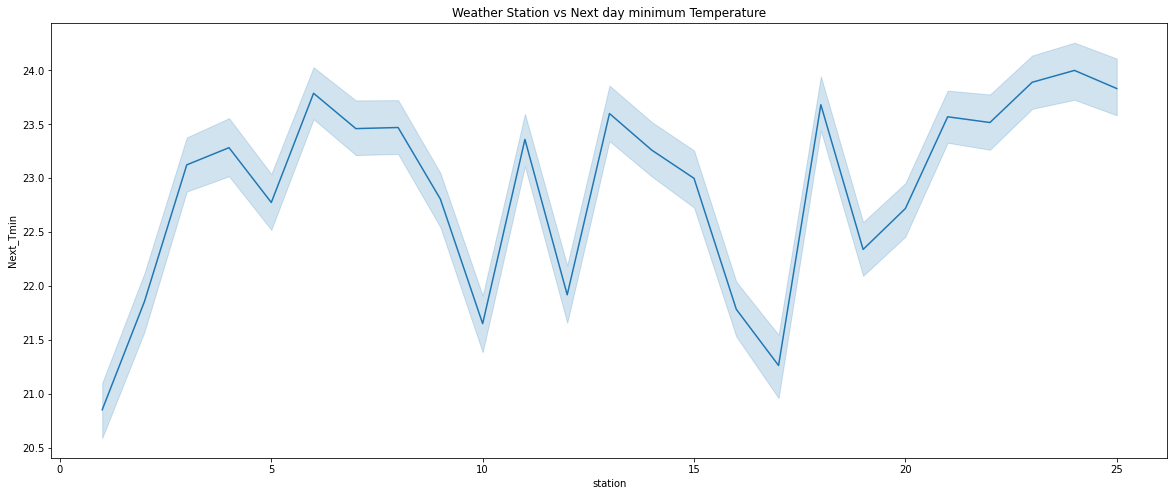

In [59]:
plt.figure(figsize=(20,8))
plt.title('Weather Station vs Next day minimum Temperature')
sns.lineplot(x='station',y='Next_Tmin',data=df)
plt.show()

The line plot clears that next day minimum temparature is high & low at station 18 & 17 respectively.

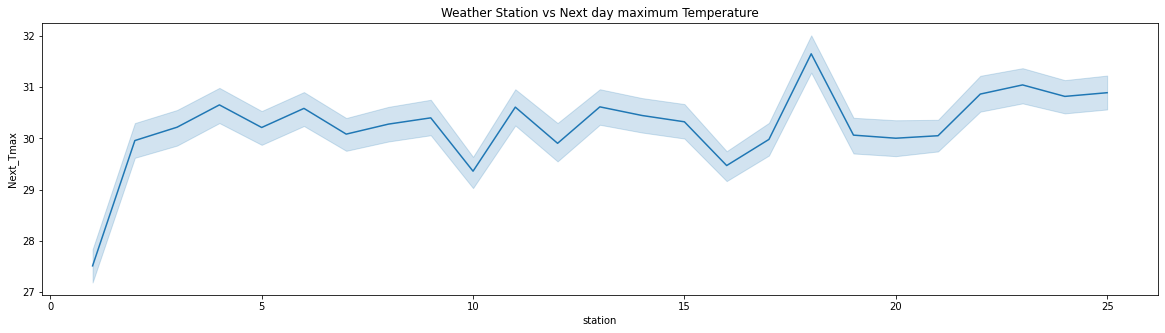

In [60]:
plt.figure(figsize=(20,5))
plt.title('Weather Station vs Next day maximum Temperature')
sns.lineplot(x='station',y='Next_Tmax',data=df)
plt.show()

Text(0, 0.5, 'Next_Tmax')

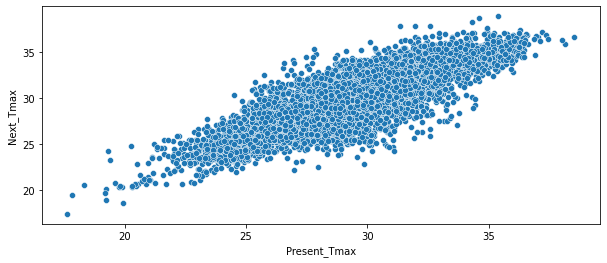

In [61]:
plt.figure(figsize=(10,4))
sns.scatterplot(df['LDAPS_Tmax_lapse'], df['Next_Tmax'])
plt.xlabel('Present_Tmax')
plt.ylabel('Next_Tmax')

With LDAPS_Tmax_lapse, temp seems to be getting higher

Text(0, 0.5, 'Next_Tmin')

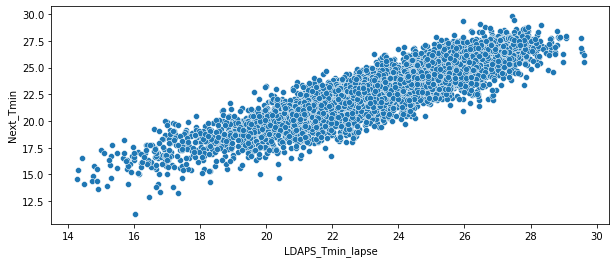

In [62]:
plt.figure(figsize=(10,4))
sns.scatterplot(df['LDAPS_Tmin_lapse'], df['Next_Tmin'])
plt.xlabel('LDAPS_Tmin_lapse')
plt.ylabel('Next_Tmin')

We Can observe LDAPS_Tmin_lapse temp, getting lower

Text(0, 0.5, 'Next_Tmin')

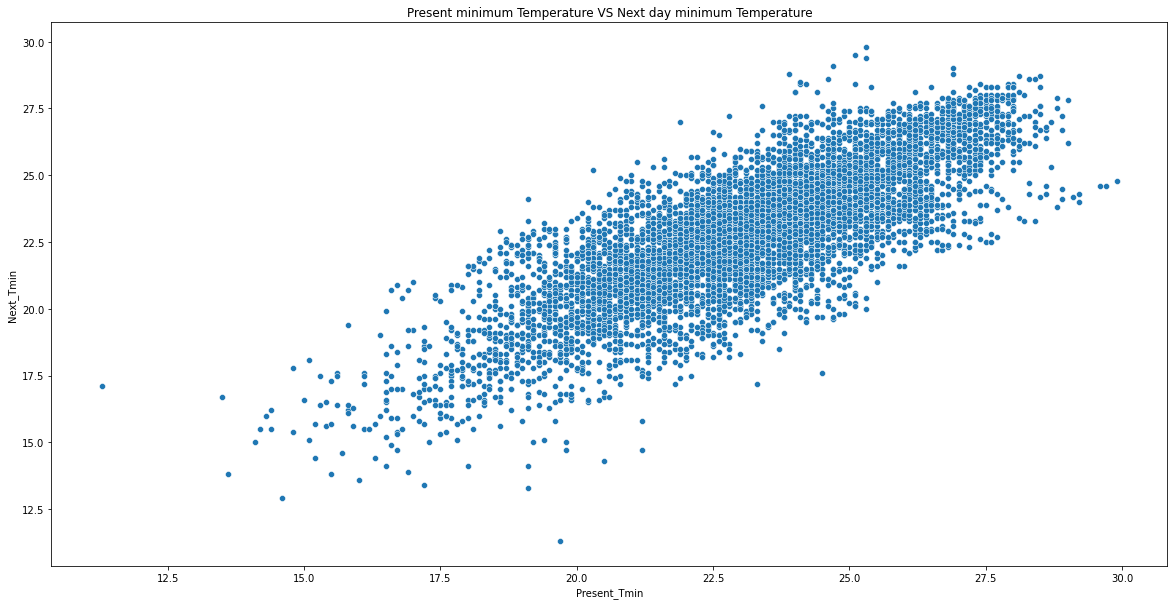

In [63]:
# Scatterplot Display distribution of data across Present minimum Temperature VS Next day minimum Temperature.
plt.figure(figsize=(20,10))
plt.title('Present minimum Temperature VS Next day minimum Temperature')
sns.scatterplot(df['Present_Tmin'], df['Next_Tmin'])
plt.xlabel('Present_Tmin')
plt.ylabel('Next_Tmin')

Text(0, 0.5, 'Next_Tmax')

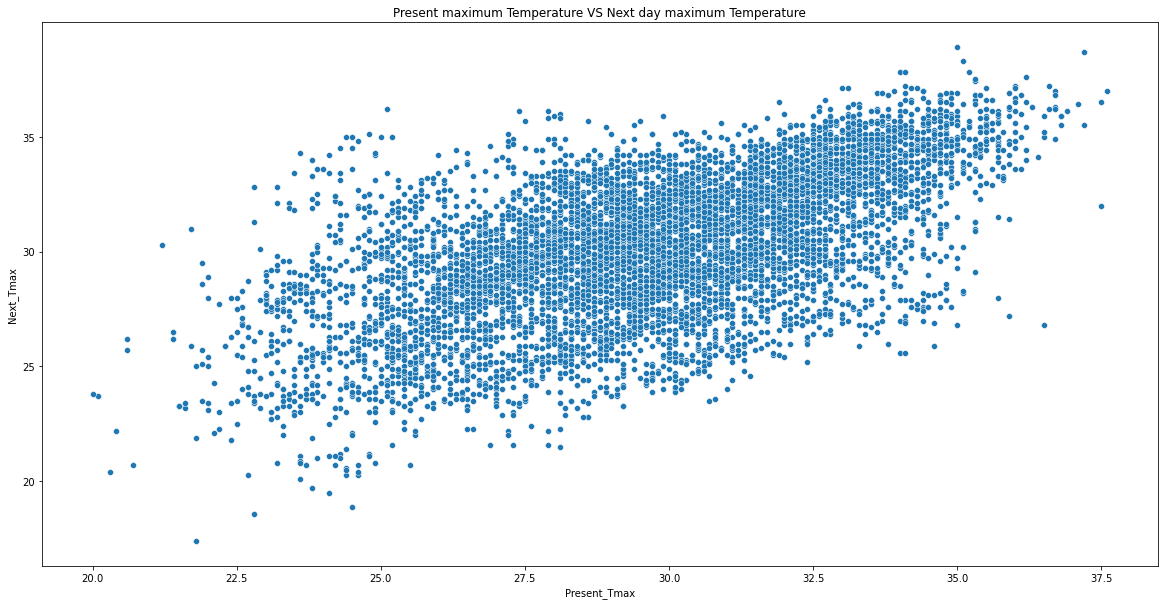

In [64]:
# Scatterplot Display distribution of data across Present maximum Temperature VS Next day maximum Temperature.
plt.figure(figsize=(20,10))
plt.title('Present maximum Temperature VS Next day maximum Temperature')
sns.scatterplot(df['Present_Tmax'], df['Next_Tmax'])
plt.xlabel('Present_Tmax')
plt.ylabel('Next_Tmax')

Here we can see when Present_Tmax is increasing Nex_Tmax is also getting higher

station                 AxesSubplot(0.125,0.71587;0.0824468x0.16413)
Present_Tmax         AxesSubplot(0.223936,0.71587;0.0824468x0.16413)
Present_Tmin         AxesSubplot(0.322872,0.71587;0.0824468x0.16413)
LDAPS_RHmin          AxesSubplot(0.421809,0.71587;0.0824468x0.16413)
LDAPS_RHmax          AxesSubplot(0.520745,0.71587;0.0824468x0.16413)
LDAPS_Tmax_lapse     AxesSubplot(0.619681,0.71587;0.0824468x0.16413)
LDAPS_Tmin_lapse     AxesSubplot(0.718617,0.71587;0.0824468x0.16413)
LDAPS_WS             AxesSubplot(0.817553,0.71587;0.0824468x0.16413)
LDAPS_LH               AxesSubplot(0.125,0.518913;0.0824468x0.16413)
LDAPS_CC1           AxesSubplot(0.223936,0.518913;0.0824468x0.16413)
LDAPS_CC2           AxesSubplot(0.322872,0.518913;0.0824468x0.16413)
LDAPS_CC3           AxesSubplot(0.421809,0.518913;0.0824468x0.16413)
LDAPS_CC4           AxesSubplot(0.520745,0.518913;0.0824468x0.16413)
LDAPS_PPT1          AxesSubplot(0.619681,0.518913;0.0824468x0.16413)
LDAPS_PPT2          AxesSubplot(0.

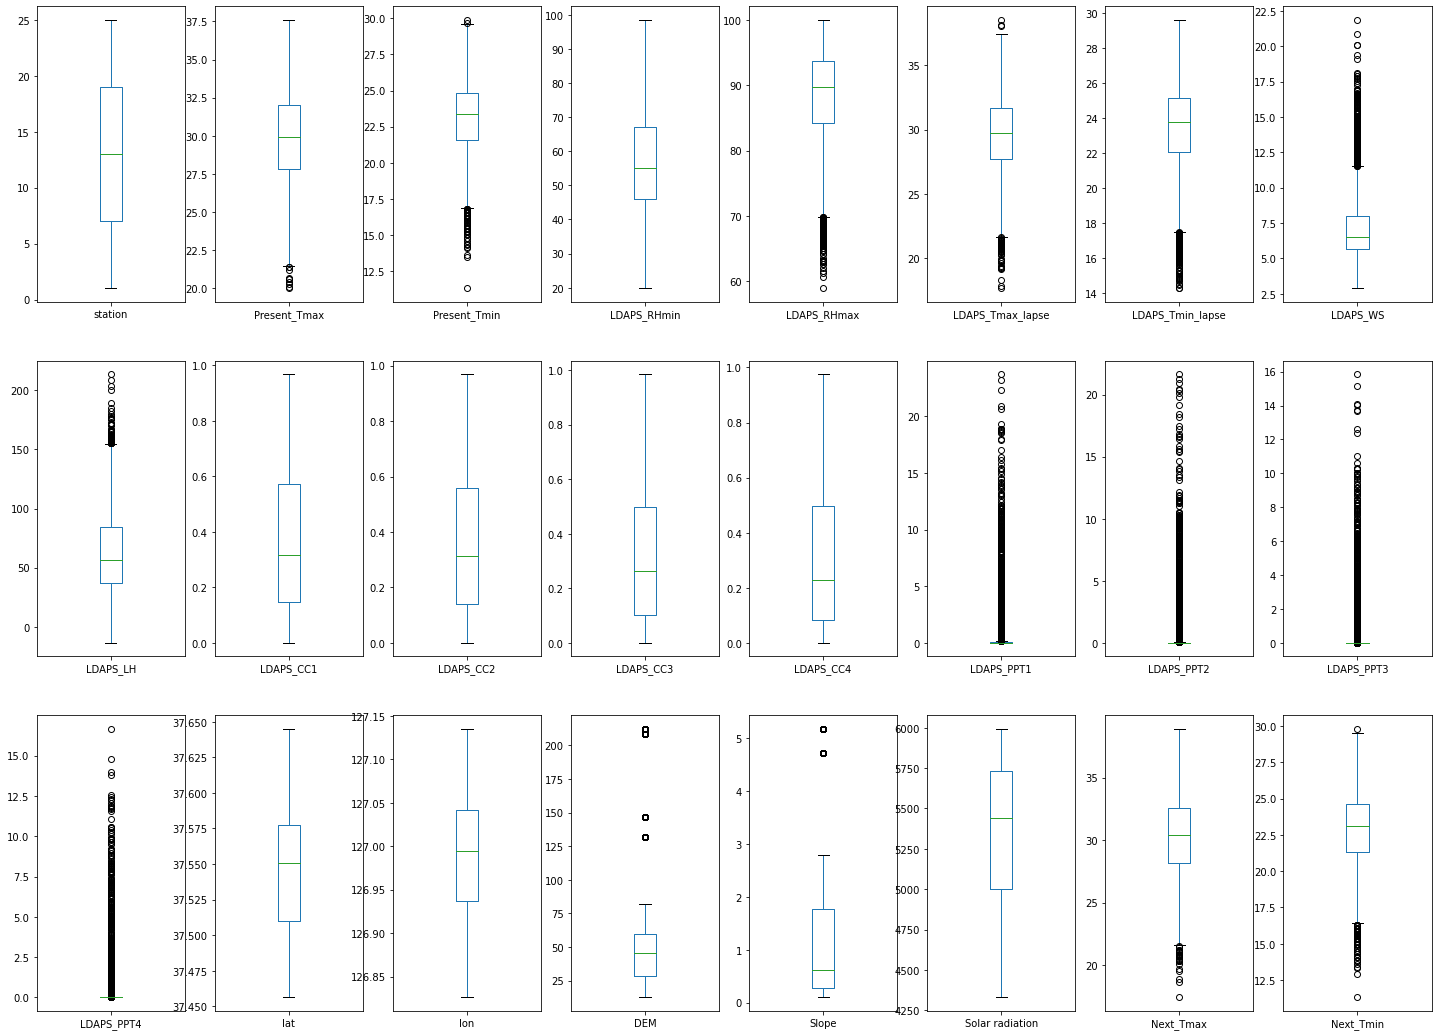

In [69]:
df.plot(kind='box',subplots=True,layout=(4,8),figsize=(25,25))

# Statistical Analysis

In [70]:
df.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [71]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=l.fit_transform(df[i].values)

In [72]:
df.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [73]:
df.describe()  #statistics summary for numerical columns 

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.00000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000
mean,13.014101,29.748366,23.195809,56.724969,88.360823,29.620128,23.511786,7.094097,62.492606,0.368510,0.355528,0.317546,0.298268,0.589008,0.480738,0.275007,0.265373,37.544792,126.99142,61.918136,1.259755,5343.724208,30.241526,22.910820
std,7.217858,2.967401,2.400880,14.626559,7.199456,2.943496,2.342579,2.177034,33.686158,0.262260,0.257922,0.249833,0.253392,1.927577,1.743327,1.146087,1.179661,0.050428,0.07922,54.323529,1.372748,429.782561,3.111807,2.482256
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.456200,126.82600,12.370000,0.098500,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.600000,45.960243,84.203724,27.673756,22.086820,5.675358,37.206201,0.146546,0.140324,0.100950,0.081495,0.000000,0.000000,0.000000,0.000000,37.510200,126.93700,28.700000,0.271300,5001.485717,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.023199,89.784122,29.709537,23.758249,6.547838,56.898324,0.315706,0.311676,0.261795,0.227459,0.000000,0.000000,0.000000,0.000000,37.550700,126.99500,45.716000,0.618000,5441.987305,30.400000,23.100000
75%,19.000000,32.000000,24.800000,67.115099,93.742725,31.711109,25.155660,8.028960,84.235666,0.574174,0.557164,0.496444,0.498127,0.052594,0.017735,0.007855,0.000017,37.577600,127.04200,59.832400,1.767800,5729.485840,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.974710,23.701544,21.621661,15.841235,16.655469,37.645000,127.13500,212.335000,5.178200,5992.895996,38.900000,29.800000


<function matplotlib.pyplot.show(close=None, block=None)>

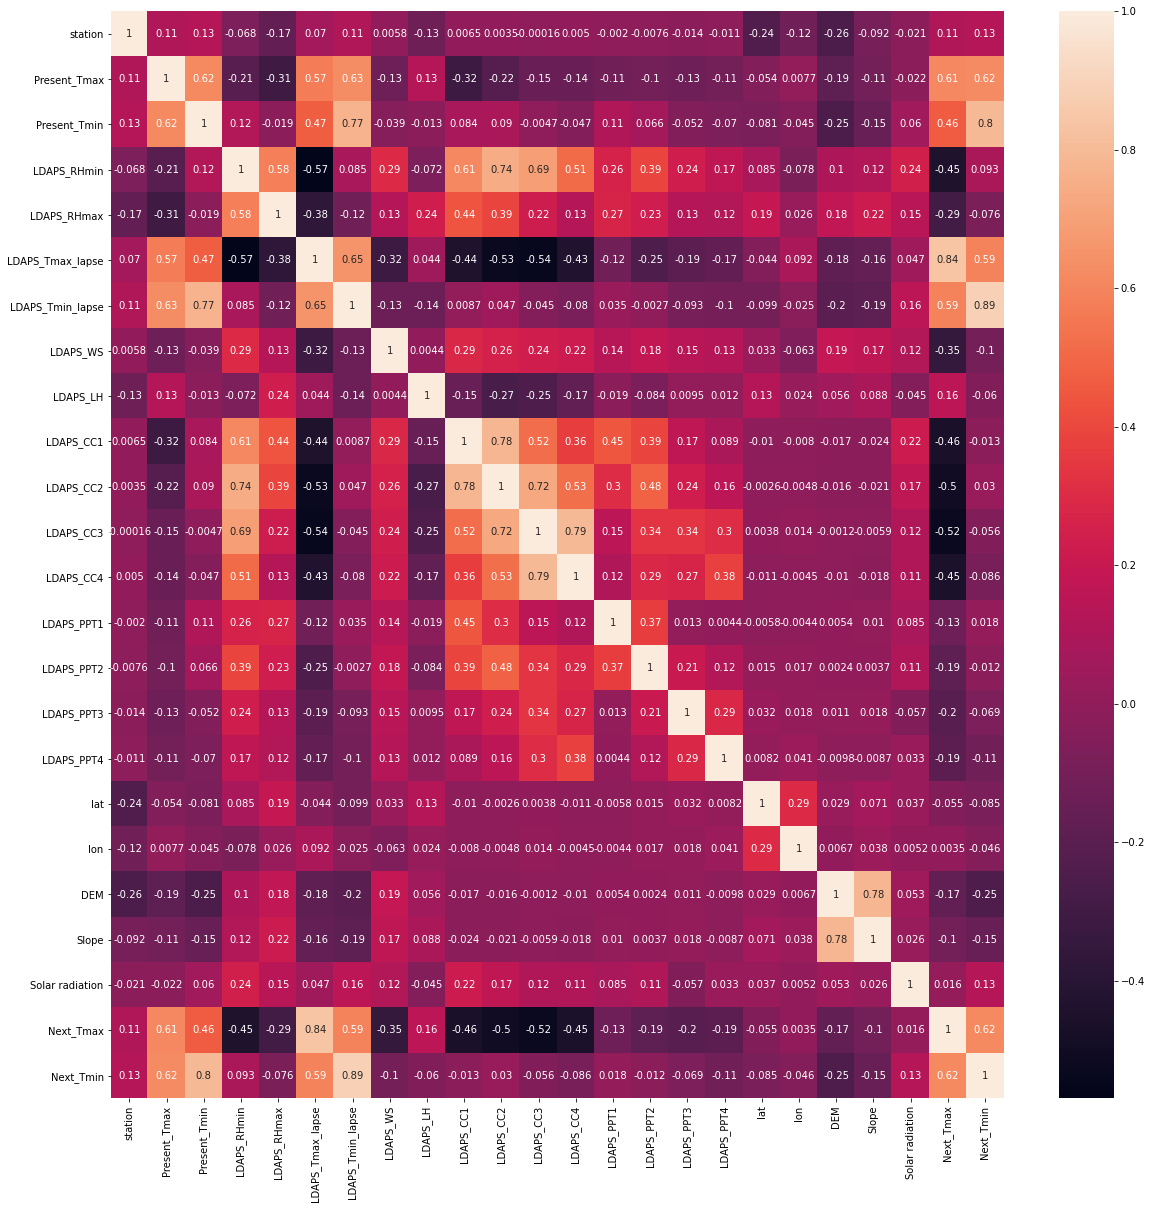

In [27]:
#Observing corelation between the columns through heatmap
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)
plt.show

In [29]:
df.corr()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,1.000000,0.113301,0.133282,-0.067846,-0.169351,0.069856,0.105277,0.005822,-0.132129,0.006539,0.003526,-0.000161,0.005005,-0.001954,-0.007635,-0.013865,-0.011085,-0.239118,-0.118845,-0.256706,-0.091721,-0.021194,0.107747,0.128184
Present_Tmax,0.113301,1.000000,0.615208,-0.209059,-0.306943,0.573777,0.628705,-0.125952,0.134246,-0.316333,-0.216976,-0.146391,-0.143069,-0.114917,-0.104779,-0.127248,-0.107295,-0.054134,0.007695,-0.189439,-0.107079,-0.022114,0.610357,0.621048
Present_Tmin,0.133282,0.615208,1.000000,0.122200,-0.018576,0.467904,0.772061,-0.038779,-0.012817,0.084348,0.090038,-0.004719,-0.046694,0.111577,0.066207,-0.052428,-0.070391,-0.081417,-0.045174,-0.254084,-0.148423,0.059765,0.463523,0.796975
LDAPS_RHmin,-0.067846,-0.209059,0.122200,1.000000,0.578358,-0.569580,0.085237,0.289422,-0.072195,0.612831,0.744774,0.688069,0.513937,0.259039,0.389572,0.237512,0.167311,0.085027,-0.077590,0.100684,0.122454,0.242168,-0.446824,0.093249
LDAPS_RHmax,-0.169351,-0.306943,-0.018576,0.578358,1.000000,-0.377293,-0.118965,0.131269,0.238986,0.435937,0.390620,0.224734,0.127242,0.268019,0.227581,0.132436,0.118101,0.194820,0.025563,0.176557,0.219436,0.146622,-0.289788,-0.076415
LDAPS_Tmax_lapse,0.069856,0.573777,0.467904,-0.569580,-0.377293,1.000000,0.653425,-0.316011,0.043663,-0.440878,-0.525380,-0.542728,-0.429739,-0.115659,-0.248369,-0.193749,-0.170415,-0.044052,0.091568,-0.181433,-0.163891,0.047414,0.835729,0.589963
LDAPS_Tmin_lapse,0.105277,0.628705,0.772061,0.085237,-0.118965,0.653425,1.000000,-0.134652,-0.139675,0.008714,0.046537,-0.044998,-0.079536,0.034956,-0.002743,-0.093116,-0.103541,-0.099452,-0.024703,-0.198396,-0.187864,0.157763,0.592119,0.886513
LDAPS_WS,0.005822,-0.125952,-0.038779,0.289422,0.131269,-0.316011,-0.134652,1.000000,0.004427,0.285349,0.257226,0.238155,0.218870,0.141503,0.181634,0.147199,0.134428,0.033025,-0.063009,0.188540,0.169223,0.120630,-0.351107,-0.102021
LDAPS_LH,-0.132129,0.134246,-0.012817,-0.072195,0.238986,0.043663,-0.139675,0.004427,1.000000,-0.148314,-0.265382,-0.246709,-0.173156,-0.018708,-0.084375,0.009495,0.012372,0.133309,0.024476,0.056362,0.087517,-0.044956,0.156779,-0.060392
LDAPS_CC1,0.006539,-0.316333,0.084348,0.612831,0.435937,-0.440878,0.008714,0.285349,-0.148314,1.000000,0.779510,0.516698,0.362670,0.446930,0.389368,0.166763,0.088897,-0.010268,-0.007962,-0.017378,-0.023893,0.218285,-0.459705,-0.012877


# Skewness handling

In [77]:
#Checking skewness
df.skew()

station            -0.004178
Present_Tmax       -0.257069
Present_Tmin       -0.353822
LDAPS_RHmin         0.301396
LDAPS_RHmax        -0.845264
LDAPS_Tmax_lapse   -0.222349
LDAPS_Tmin_lapse   -0.574035
LDAPS_WS            1.553926
LDAPS_LH            0.662971
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.639649
LDAPS_CC4           0.663815
LDAPS_PPT1          5.305906
LDAPS_PPT2          5.710360
LDAPS_PPT3          6.356670
LDAPS_PPT4          6.681256
lat                 0.085377
lon                -0.289048
DEM                 1.721617
Slope               1.559050
Solar radiation    -0.524325
Next_Tmax          -0.334842
Next_Tmin          -0.393662
dtype: float64

Skewness range more than+/- 0.5 will be treated

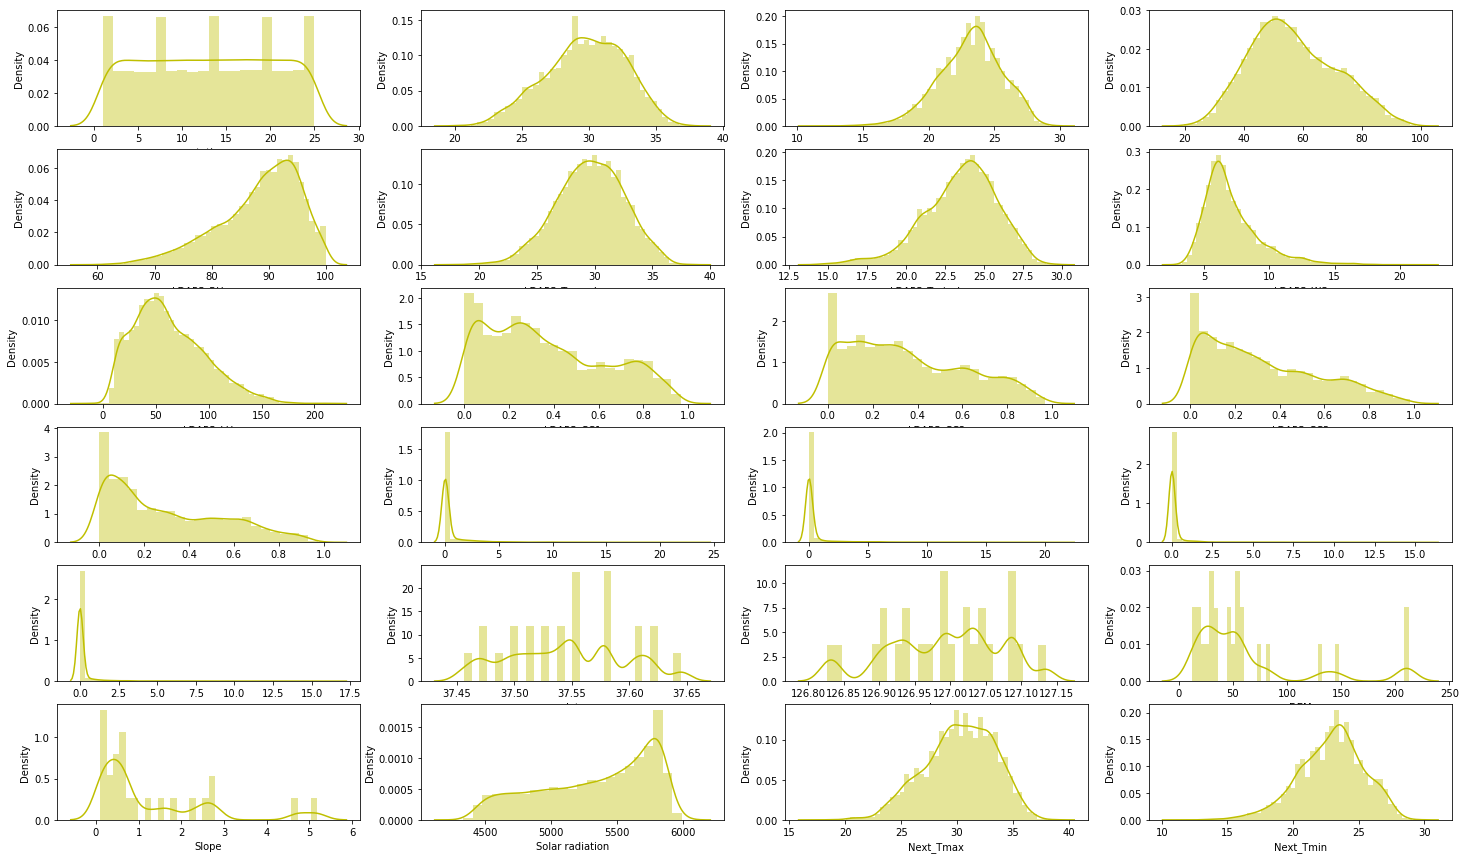

In [75]:
plt.figure(figsize=(25,20))
for i in enumerate(df.columns):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df[i[1]],color='y')

In [78]:
#Removing skewness of the data
from sklearn.preprocessing import PowerTransformer
PT=PowerTransformer()
for i in df.columns:
    if abs(df.loc[:,i].skew())>0.5:
        df.loc[:,i]=PT.fit_transform(df.loc[:,i].values.reshape(-1,1))

In [79]:
#Checking skewness again
df.skew()

station            -0.004178
Present_Tmax       -0.257069
Present_Tmin       -0.353822
LDAPS_RHmin         0.301396
LDAPS_RHmax        -0.120174
LDAPS_Tmax_lapse   -0.222349
LDAPS_Tmin_lapse   -0.021647
LDAPS_WS            0.005937
LDAPS_LH            0.028141
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.091156
LDAPS_CC4           0.129974
LDAPS_PPT1          1.451770
LDAPS_PPT2          1.637689
LDAPS_PPT3          1.814526
LDAPS_PPT4          2.041426
lat                 0.085377
lon                -0.289048
DEM                 0.039591
Slope               0.233968
Solar radiation    -0.182349
Next_Tmax          -0.334842
Next_Tmin          -0.393662
dtype: float64

# Outliers Handling

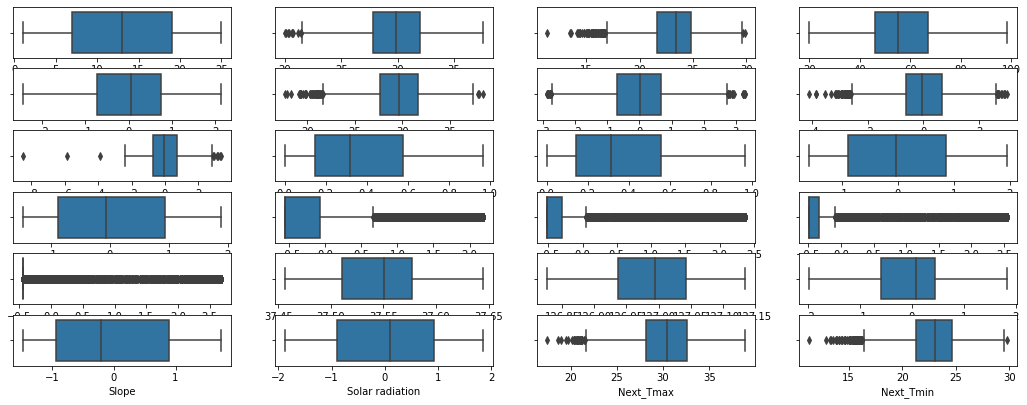

In [80]:
plt.figure(figsize=(18,10))
for o in enumerate(df):
    plt.subplot(9,4,o[0]+1)
    sns.boxplot(df[o[1]])

Only some of columns seems having outliers after skewness removed .

# Removing Outliers

In [30]:
print("The shape before removing outliers",df.shape)
print("skewness before removing outliers")
print(df.skew())
from scipy.stats import zscore
z=np.abs(zscore(df))
df1=df[(z<3).all(axis=1)]
print("New shape after removing outliers",df1.shape)
print("skewness after removing outliers")
print(df1.skew())

The shape before removing outliers (7588, 24)
skewness before removing outliers
station            -0.004178
Present_Tmax       -0.257069
Present_Tmin       -0.353822
LDAPS_RHmin         0.301396
LDAPS_RHmax        -0.845264
LDAPS_Tmax_lapse   -0.222349
LDAPS_Tmin_lapse   -0.574035
LDAPS_WS            1.553926
LDAPS_LH            0.662971
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.639649
LDAPS_CC4           0.663815
LDAPS_PPT1          5.305906
LDAPS_PPT2          5.710360
LDAPS_PPT3          6.356670
LDAPS_PPT4          6.681256
lat                 0.085377
lon                -0.289048
DEM                 1.721617
Slope               1.559050
Solar radiation    -0.524325
Next_Tmax          -0.334842
Next_Tmin          -0.393662
dtype: float64
New shape after removing outliers (6739, 24)
skewness after removing outliers
station            -0.001594
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax    

# Splitting the data into input and target

# Taking Next_Tmax as Target Variable

In [31]:
x=df1.drop(['Next_Tmax','Next_Tmin'],axis=1)
y=df1['Next_Tmax']

In [32]:
x.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246


In [33]:
y.head()

0    29.1
1    30.5
2    31.1
3    31.7
4    31.2
Name: Next_Tmax, dtype: float64

In [34]:
print(x.shape)
print(y.shape)

(6739, 22)
(6739,)


In [35]:
#  scaling data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(x))

StandardScaler()


In [36]:
#Importing Required Libraries
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [37]:
def maxr2_score(regr,x,y):
    max_r_score=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state= i ,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_i=i
    print("max r2 score corresponding to",final_i,"is",max_r_score)
    return final_i

In [38]:
lreg=LinearRegression()
i=maxr2_score(lreg,x,y)

max r2 score corresponding to 84 is 0.7874177209677945


In [39]:
print("Mean r2 score for Linear Regression:",cross_val_score(lreg,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Linear Regression",cross_val_score(lreg,x,y,cv=5,scoring="r2").std())

Mean r2 score for Linear Regression: 0.6921369530051653
standard deviation in r2 score for Linear Regression 0.025380047248780613


# Using GridSearchCV to find best parameters

In [40]:
knr=KNeighborsRegressor()
parameters={'n_neighbors':range(1,10),'algorithm':['auto', 'ball_tree', 'kd_tree']}
gd=GridSearchCV(knr,parameters)
gd.fit(x,y)
print(gd.best_params_)
print("\n")

lsreg=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1],'selection' : ['cyclic', 'random']}
gd=GridSearchCV(lsreg,parameters)
gd.fit(x,y)
print(gd.best_params_)
print("\n")

dtr=DecisionTreeRegressor()
parameters={'criterion':('mse', 'friedman_mse', 'mae'),'max_features' : ['auto', 'sqrt', 'log2']}
gd=GridSearchCV(dtr,parameters)
gd.fit(x,y)
print(gd.best_params_)
print("\n")

enr=ElasticNet()
parametors={"alpha":[0.001,0.01,0.1,1]}
gd=GridSearchCV(enr,parametors)
gd.fit(x,y)
print(gd.best_params_)
print("\n")

rfr=RandomForestRegressor()
parameters={"n_estimators":[10,50,100,120,150,200],"max_features": ["auto", "sqrt", "log2"]}
gd=GridSearchCV(rfr,parameters,cv=5)
gd.fit(x,y)
print(gd.best_params_)
print("\n")

svr=SVR()
parameters={"kernel" : ( "Linear" ,"rbf" ) ,"C": [0.01,0.1,1,10]}
gd=GridSearchCV(svr,parameters)
gd.fit(x,y)
print(gd.best_params_)
print("\n")

gbr=GradientBoostingRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,50,100,120,150,200]}
gd=GridSearchCV(gbr,parameters)
gd.fit(x,y)
print(gd.best_params_)
print("\n")

{'algorithm': 'auto', 'n_neighbors': 9}


{'alpha': 0.001, 'selection': 'random'}


{'criterion': 'friedman_mse', 'max_features': 'auto'}


{'alpha': 0.01}


{'max_features': 'sqrt', 'n_estimators': 200}


{'C': 10, 'kernel': 'rbf'}


{'learning_rate': 0.1, 'n_estimators': 50}




In [41]:
knn=KNeighborsRegressor(algorithm='auto', n_neighbors=9)
i=maxr2_score(knn,x,y)
print("\n")

print("Mean r2 score for KNeighbor  Regression:",cross_val_score(knr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for KNeighbor   Regression",cross_val_score(knr,x,y,cv=5,scoring="r2").std())
print("\n___________________________________________________________________________________________________________\n")

lsreg=Lasso(alpha=0.1, selection='cyclic')
i=maxr2_score(lsreg,x,y)
print("\n")

print("Mean r2 score for Lasso Regression:",cross_val_score(lsreg,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Lasso Regression",cross_val_score(lsreg,x,y,cv=5,scoring="r2").std())
print("\n___________________________________________________________________________________________________________\n")


dtr=DecisionTreeRegressor(criterion = 'mae',max_features='auto')
i=maxr2_score(dtr,x,y)
print("\n")

print("Mean r2 score for DecisionTreeRegressor :",cross_val_score(dtr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for DecisionTreeRegressor",cross_val_score(dtr,x,y,cv=5,scoring="r2").std())
print("\n_____________________________________________________________________________________________________________\n")

enr=ElasticNet(alpha=0.1)
i=maxr2_score(enr,x,y)
print("\n")

print("Mean r2 score for Elastic net Regression:",cross_val_score(enr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Elastic net Regression",cross_val_score(enr,x,y,cv=5,scoring="r2").std())
print("\n_____________________________________________________________________________________________________________\n")



rfr=RandomForestRegressor(max_features='auto',n_estimators=200)
i=maxr2_score(rfr,x,y)
print("\n")

print("Mean r2 score for RandomForestRegressor :",cross_val_score(rfr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for RandomForestRegressor ",cross_val_score(rfr,x,y,cv=5,scoring="r2").std())
print("\n_____________________________________________________________________________________________________________\n")


gbr=GradientBoostingRegressor(learning_rate=0.1,n_estimators=120)
i=maxr2_score(gbr,x,y)
print("\n")

print("Mean r2 score for gradient boosting Regression:",cross_val_score(gbr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for gradient boosting Regression",cross_val_score(gbr,x,y,cv=5,scoring="r2").std())
print("\n_____________________________________________________________________________________________________________\n")


svr=SVR(C= 10, kernel= 'rbf')
i=maxr2_score(svr,x,y)
print("\n")

print("Mean r2 score for SVR:",cross_val_score(gbr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for SVR",cross_val_score(gbr,x,y,cv=5,scoring="r2").std())
print("\n_____________________________________________________________________________________________________________\n")

max r2 score corresponding to 52 is 0.5463296089797456


Mean r2 score for KNeighbor  Regression: 0.1524258978613063
standard deviation in r2 score for KNeighbor   Regression 0.1930221941617415

___________________________________________________________________________________________________________

max r2 score corresponding to 52 is 0.7541544908964388


Mean r2 score for Lasso Regression: 0.6733447103504517
standard deviation in r2 score for Lasso Regression 0.052138879982141915

___________________________________________________________________________________________________________

max r2 score corresponding to 67 is 0.7626295304405996


Mean r2 score for DecisionTreeRegressor : 0.3902648746665651
standard deviation in r2 score for DecisionTreeRegressor 0.09469147105996112

_____________________________________________________________________________________________________________

max r2 score corresponding to 52 is 0.761704431730734


Mean r2 score for Elastic net Regressi

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 84,test_size=0.20)
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)

In [43]:
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred))

RMSE is:  0.9293836315174919
r2_score is:  0.9032731068378553


# Taking Next_Tmin as Target Variable

In [44]:
x=df1.drop(['Next_Tmin','Next_Tmax'],axis=1)
y=df1['Next_Tmin']

In [45]:
x.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246


In [46]:
y.head()

0    21.2
1    22.5
2    23.9
3    24.3
4    22.5
Name: Next_Tmin, dtype: float64

In [47]:
print(x.shape)
print(y.shape)

(6739, 22)
(6739,)


In [48]:
#  scaling data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(x))

StandardScaler()


In [49]:
def maxr2_score(regr,x,y):
    max_r_score=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state= i ,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_i=i
    print("max r2 score corresponding to",final_i,"is",max_r_score)
    return final_i

In [50]:
lreg=LinearRegression()
i=maxr2_score(lreg,x,y)

max r2 score corresponding to 70 is 0.8416717425535518


In [51]:
print("Mean r2 score for Linear Regression:",cross_val_score(lreg,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Linear Regression",cross_val_score(lreg,x,y,cv=5,scoring="r2").std())

Mean r2 score for Linear Regression: 0.7750428209710598
standard deviation in r2 score for Linear Regression 0.07439746103067303


In [52]:
knr=KNeighborsRegressor()
parameters={'n_neighbors':range(1,10),'algorithm':['auto', 'ball_tree', 'kd_tree']}
gd=GridSearchCV(knr,parameters)
gd.fit(x,y)
print(gd.best_params_)
print("\n")

lsreg=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1],'selection' : ['cyclic', 'random']}
gd=GridSearchCV(lsreg,parameters)
gd.fit(x,y)
print(gd.best_params_)
print("\n")

dtr=DecisionTreeRegressor()
parameters={'criterion':('mse', 'friedman_mse', 'mae'),'max_features' : ['auto', 'sqrt', 'log2']}
gd=GridSearchCV(dtr,parameters)
gd.fit(x,y)
print(gd.best_params_)
print("\n")

enr=ElasticNet()
parametors={"alpha":[0.001,0.01,0.1,1]}
gd=GridSearchCV(enr,parametors)
gd.fit(x,y)
print(gd.best_params_)
print("\n")

rfr=RandomForestRegressor()
parameters={"n_estimators":[10,50,100,120,150],"max_features": ["auto", "sqrt", "log2"]}
gd=GridSearchCV(rfr,parameters,cv=5)
gd.fit(x,y)
print(gd.best_params_)
print("\n")

svr=SVR()
parameters={"kernel" : ( "Linear" ,"rbf" ) ,"C": [1,10]}
gd=GridSearchCV(svr,parameters)
gd.fit(x,y)
print(gd.best_params_)
print("\n")

gbr=GradientBoostingRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,50,100,120,150]}
gd=GridSearchCV(gbr,parameters)
gd.fit(x,y)
print(gd.best_params_)
print("\n")

{'algorithm': 'auto', 'n_neighbors': 9}


{'alpha': 0.01, 'selection': 'cyclic'}


{'criterion': 'friedman_mse', 'max_features': 'auto'}


{'alpha': 0.01}


{'max_features': 'auto', 'n_estimators': 150}


{'C': 10, 'kernel': 'rbf'}


{'learning_rate': 0.1, 'n_estimators': 120}




In [53]:
knn=KNeighborsRegressor(algorithm='auto', n_neighbors=9)
i=maxr2_score(knn,x,y)
print("\n")

print("Mean r2 score for KNeighbor  Regression:",cross_val_score(knr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for KNeighbor   Regression",cross_val_score(knr,x,y,cv=5,scoring="r2").std())
print("\n___________________________________________________________________________________________________________\n")

lsreg=Lasso(alpha=0.01, selection='cyclic')
i=maxr2_score(lsreg,x,y)
print("\n")

print("Mean r2 score for Lasso Regression:",cross_val_score(lsreg,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Lasso Regression",cross_val_score(lsreg,x,y,cv=5,scoring="r2").std())
print("\n___________________________________________________________________________________________________________\n")


dtr=DecisionTreeRegressor(criterion = 'mse',max_features='auto')
i=maxr2_score(dtr,x,y)
print("\n")

print("Mean r2 score for DecisionTreeRegressor :",cross_val_score(dtr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for DecisionTreeRegressor",cross_val_score(dtr,x,y,cv=5,scoring="r2").std())
print("\n_____________________________________________________________________________________________________________\n")

enr=ElasticNet(alpha=0.1)
i=maxr2_score(enr,x,y)
print("\n")

print("Mean r2 score for Elastic net Regression:",cross_val_score(enr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Elastic net Regression",cross_val_score(enr,x,y,cv=5,scoring="r2").std())
print("\n_____________________________________________________________________________________________________________\n")



rfr=RandomForestRegressor(max_features='auto',n_estimators=120)
i=maxr2_score(rfr,x,y)
print("\n")

print("Mean r2 score for RandomForestRegressor :",cross_val_score(rfr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for RandomForestRegressor ",cross_val_score(rfr,x,y,cv=5,scoring="r2").std())
print("\n_____________________________________________________________________________________________________________\n")


gbr=GradientBoostingRegressor(learning_rate=0.1,n_estimators=100)
i=maxr2_score(gbr,x,y)
print("\n")

print("Mean r2 score for gradient boosting Regression:",cross_val_score(gbr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for gradient boosting Regression",cross_val_score(gbr,x,y,cv=5,scoring="r2").std())
print("\n_____________________________________________________________________________________________________________\n")


svr=SVR(C= 10, kernel= 'rbf')
i=maxr2_score(svr,x,y)
print("\n")

print("Mean r2 score for SVR:",cross_val_score(gbr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for SVR",cross_val_score(gbr,x,y,cv=5,scoring="r2").std())
print("\n_____________________________________________________________________________________________________________\n")

max r2 score corresponding to 48 is 0.5318141325425498


Mean r2 score for KNeighbor  Regression: 0.035348162040252776
standard deviation in r2 score for KNeighbor   Regression 0.29502821223074815

___________________________________________________________________________________________________________

max r2 score corresponding to 70 is 0.8401642483877849


Mean r2 score for Lasso Regression: 0.7783149546004497
standard deviation in r2 score for Lasso Regression 0.07335326773095889

___________________________________________________________________________________________________________

max r2 score corresponding to 70 is 0.7967130526936029


Mean r2 score for DecisionTreeRegressor : 0.6083241790595023
standard deviation in r2 score for DecisionTreeRegressor 0.09777893659350592

_____________________________________________________________________________________________________________

max r2 score corresponding to 70 is 0.835528986976798


Mean r2 score for Elastic net Regres

In [54]:

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 82,test_size=0.20)
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)

In [55]:
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred))

RMSE is:  0.7280156267570813
r2_score is:  0.9052108759847775


# Saving Model

In [56]:
import joblib
model=joblib.dump(rfr,"Temperature_Prediction.pkl")